In [1]:
import numpy as np
import csv, os
import matplotlib.pyplot as plt

In [2]:
# train = "./src/results/log_train_16_23-02-2024_10-15-39.csv"
# valid = "./rc/results/log_valid_16_23-02-2024_10-15-39"
dataset = "rimes"
loss_name = "vgg"
vgg_layer = 9
max_word_len = 8
folder_name = f"{dataset}/{loss_name}-{vgg_layer}-{max_word_len}char-adam-lr001-lin"
train = "./src/saved_losses/saved_losses/" + folder_name + '/log_train_16_11-03-2024_18-13-06.csv'
eval = "./src/saved_losses/saved_losses/" + folder_name + '/log_valid_16_11-03-2024_18-13-06.csv'
print(os.getcwd())

c:\Users\Lisa\Documents\GitHub\handwriting-recognition


In [3]:
def read_eval_losses(eval_path):
    epochs = []
    losses = []
    cers = []
    wers = []
    with open(eval_path) as eval_f:
        reader = csv.reader(eval_f, delimiter=',')
        idx = 0
        for line in reader:
            print(line)
            idx += 1
            epoch, loss, cer, wer = line[0].split(" ")
            epochs.append(epoch)
            losses.append(loss)
            cers.append(cer)
            wers.append(wer)

    return np.array(epochs, dtype=np.int16), np.array(losses, dtype=np.float32), np.array(cers, dtype=np.float32), np.array(wers, dtype=np.float32)

epochs, train_losses, train_cers, train_wers = read_eval_losses(train)
epochs, valid_losses, valid_cers, valid_wers = read_eval_losses(eval)
    



['0 1.921047 1. 1.']
['1 1.9189825 1. 1.']
['2 1.9188098 1. 1.']
['3 1.9189023 1. 1.']
['4 1.9193432 1. 1.']
['5 1.9188468 1. 1.']
['6 1.9185952 1. 1.']
['7 1.9190671 1. 1.']
['8 1.918992 1. 1.']
['9 1.7145306 0.93445556 1.']
['10 1.6481344 0.92514887 1.']
['11 1.6277217 0.92167473 1.']
['12 1.6209747 0.92349808 1.']
['13 1.6182098 0.92393558 1.']
['14 1.6167537 0.92142192 1.']
['15 1.6142039 0.92047924 1.']
['16 1.6119765 0.92315779 1.']
['17 1.6090045 0.92011975 1.']
['18 1.6063504 0.92097275 1.']
['19 1.6044877 0.92226559 1.']
['20 1.6028333 0.92202283 1.']
['21 1.6007843 0.92181853 1.']
['22 1.5989794 0.92325771 1.']
['23 1.5976846 0.92139675 1.']
['24 1.5966467 0.91868717 1.']
['25 1.5956769 0.92028623 1.']
['26 1.5949998 0.92249058 1.']
['27 1.5941975 0.9241587 1.']
['28 1.5951923 0.92703177 1.']
['29 1.5934824 0.9267254 1.']
['0 1.9087807 1. 1.']
['1 1.9093554 1. 1.']
['2 1.9101743 1. 1.']
['3 1.9097809 1. 1.']
['4 1.9089875 1. 1.']
['5 1.9088267 1. 1.']
['6 1.9083695 1. 1.']
['

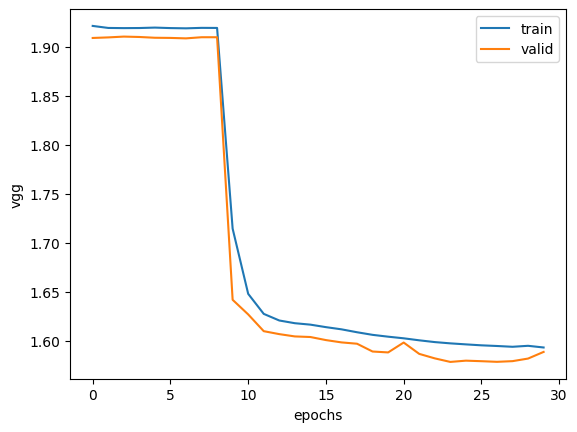

In [4]:
plt.plot(epochs, train_losses, label="train")
plt.plot(epochs, valid_losses, label="valid")
plt.xlabel("epochs")
plt.ylabel(loss_name)
plt.legend()
plt.savefig( "./src/saved_losses/saved_losses/" + folder_name +  "/losses.png", dpi=300, bbox_inches="tight")
plt.show()



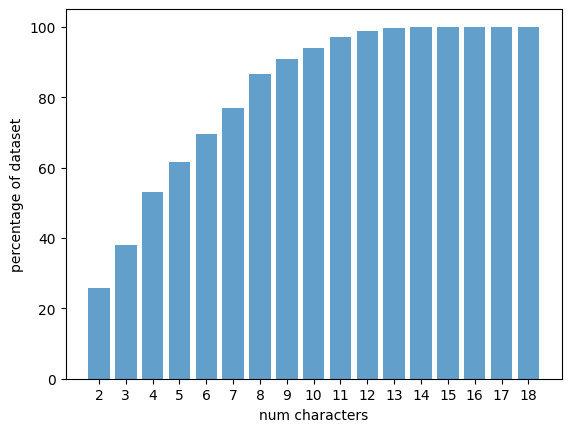

In [5]:

lengths = [i for i in range(2, 19)]
counts = [15981, 7523, 9388, 5227, 4817, 4681, 5911, 2648, 2000, 1936, 924, 539, 180, 64, 19, 4, 6]
sum_counts = sum(counts)
counts = [count/sum_counts * 100 for count in counts]
counts = [sum(counts[:idx + 1]) for idx in range(len(counts))]

plt.bar(lengths, counts, align='center', alpha=0.7)
plt.xlabel("num characters")
plt.ylabel("percentage of dataset")
plt.xticks(lengths)
plt.savefig('./word_len_counts.png', dpi=300, bbox_inches="tight")
plt.show()